In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
address = 'Gandhinagar'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

23.2232877 72.6492267


In [6]:
# create map of Gandhinagar using latitude and longitude values
map_gandhinagar = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gandhinagar) 

map_gandhinagar

In [7]:
CLIENT_ID = 'K3I2EK1V11BIMY50KEQXCCESY15KFPFOXXJGVPFGCGBS2SUD' # your Foursquare ID
CLIENT_SECRET = 'IVIIQL4DECYMKNR1AWPFJBANYJEO4ONZ0DNCREZBGTRUKRR3' # your Foursquare Secret
VERSION = '20180605' 
LIMIT=100# Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: K3I2EK1V11BIMY50KEQXCCESY15KFPFOXXJGVPFGCGBS2SUD
CLIENT_SECRET:IVIIQL4DECYMKNR1AWPFJBANYJEO4ONZ0DNCREZBGTRUKRR3


In [8]:
radius = 120000

In [31]:
search_query = 'food'

In [32]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=K3I2EK1V11BIMY50KEQXCCESY15KFPFOXXJGVPFGCGBS2SUD&client_secret=IVIIQL4DECYMKNR1AWPFJBANYJEO4ONZ0DNCREZBGTRUKRR3&ll=23.2232877,72.6492267&v=20180605&query=food&radius=120000&limit=100'

In [33]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e8ccc8d1e152c001b8cf851'},
 'response': {'venues': [{'id': '50a51858e4b05906e7e9fbd3',
    'name': 'Banglore fast food',
    'location': {'lat': 23.234755646271992,
     'lng': 72.65037339718096,
     'labeledLatLngs': [{'label': 'display',
       'lat': 23.234755646271992,
       'lng': 72.65037339718096}],
     'distance': 1281,
     'cc': 'IN',
     'country': 'India',
     'formattedAddress': ['India']},
    'categories': [{'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'shortName': 'Fast Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586285778',
    'hasPerk': False},
   {'id': '5751b77b498e15594af81942',
    'name': 'Rio Fast-food',
    'location': {'address': 'Sector 21',
     'lat': 23.233337,
     'lng': 72.66407,
     'labeledLatLngs': [{'label': 'dis

In [34]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",False,50a51858e4b05906e7e9fbd3,NaN,IN,NaN,India,NaN,1281,[India],"[{'label': 'display', 'lat': 23.23475564627199...",23.234756,72.650373,NaN,NaN,Banglore fast food,v-1586285778
1,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,5751b77b498e15594af81942,Sector 21,IN,Gandhinagar,India,NaN,1885,"[Sector 21, Gandhinagar, Gujarāt, India]","[{'label': 'display', 'lat': 23.233337, 'lng':...",23.233337,72.664070,NaN,Gujarāt,Rio Fast-food,v-1586285778
2,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",False,522db12e11d22df748c718f5,Shop No.5,IN,"Sector 11, Gandhinagar",India,"Plot No. 231,",2216,"[Shop No.5 (Plot No. 231,), Sector 11, Gandhin...","[{'label': 'display', 'lat': 23.23156707244295...",23.231567,72.668937,NaN,Gujrath,Radhe Food Court,v-1586285778
3,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",False,54a2ad58498e1c9f0f011400,NaN,IN,NaN,India,NaN,3145,[India],"[{'label': 'display', 'lat': 23.19890241600998...",23.198902,72.633703,NaN,NaN,Bueno Fast Food,v-1586285778
4,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,53ba17d4498e531e3fad6ad0,NaN,IN,NaN,India,NaN,3270,[India],"[{'label': 'display', 'lat': 23.19701971800403...",23.197020,72.634910,NaN,NaN,South Indian Food Court,v-1586285778


In [35]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Banglore fast food,Fast Food Restaurant,NaN,IN,NaN,India,NaN,1281,[India],"[{'label': 'display', 'lat': 23.23475564627199...",23.234756,72.650373,NaN,NaN,50a51858e4b05906e7e9fbd3
1,Rio Fast-food,Indian Restaurant,Sector 21,IN,Gandhinagar,India,NaN,1885,"[Sector 21, Gandhinagar, Gujarāt, India]","[{'label': 'display', 'lat': 23.233337, 'lng':...",23.233337,72.664070,NaN,Gujarāt,5751b77b498e15594af81942
2,Radhe Food Court,Fast Food Restaurant,Shop No.5,IN,"Sector 11, Gandhinagar",India,"Plot No. 231,",2216,"[Shop No.5 (Plot No. 231,), Sector 11, Gandhin...","[{'label': 'display', 'lat': 23.23156707244295...",23.231567,72.668937,NaN,Gujrath,522db12e11d22df748c718f5
3,Bueno Fast Food,Fast Food Restaurant,NaN,IN,NaN,India,NaN,3145,[India],"[{'label': 'display', 'lat': 23.19890241600998...",23.198902,72.633703,NaN,NaN,54a2ad58498e1c9f0f011400
4,South Indian Food Court,Indian Restaurant,NaN,IN,NaN,India,NaN,3270,[India],"[{'label': 'display', 'lat': 23.19701971800403...",23.197020,72.634910,NaN,NaN,53ba17d4498e531e3fad6ad0
5,Yash food point and cafe,None,NaN,IN,NaN,India,NaN,3377,[India],"[{'label': 'display', 'lat': 23.19615821354091...",23.196158,72.634438,NaN,NaN,50aba1d0e4b079c12db7c28d
6,South Food Corner,Asian Restaurant,NaN,IN,NaN,India,NaN,3543,[India],"[{'label': 'display', 'lat': 23.19559346008514...",23.195593,72.632150,NaN,NaN,542040d5498ec391c4248cd7
7,Vijay Food Court,Snack Place,NaN,IN,NaN,India,NaN,3570,[India],"[{'label': 'display', 'lat': 23.19533470627333...",23.195335,72.632121,NaN,NaN,542abfbf498eefacefed103b
8,Rajvee Food Corner,Indian Restaurant,NaN,IN,NaN,India,NaN,5235,[India],"[{'label': 'display', 'lat': 23.17712726401786...",23.177127,72.639402,NaN,NaN,5061cf8ce4b0c3acc9c39b7e
9,Four Food Restaurant,Indian Restaurant,New York Tower,IN,Ahmedabad,India,S. G. Highway,23313,"[New York Tower (S. G. Highway), Ahmedabad, Gu...","[{'label': 'display', 'lat': 23.05173647649029...",23.051736,72.518591,NaN,Gujarāt,4ebbf055d3e31a8e61b11175


In [23]:
dataframe_filtered.name

0                           Banglore fast food
1                                Rio Fast-food
2                             Radhe Food Court
3                              Bueno Fast Food
4                      South Indian Food Court
5                     Yash food point and cafe
6                            South Food Corner
7                             Vijay Food Court
8                           Rajvee Food Corner
9                         Four Food Restaurant
10                         Food court @ alpha1
11               Corn Fantasy, Kathiawadi Food
12                       Ganpati Food Products
13                       Fassos Food Service's
14                              Kena Fast Food
15               Shanti Restaurant & Fast Food
16              Golden Dragon fast Food Center
17                           kerala food court
18                            High Street Food
19                           Honest Food Court
20        Le Chowk - International Street Food
21       Food

In [36]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the gandhinagar
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Gandhinagar',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [103]:
dataframe_filtered.groupby('categories').count()
df_an=dataframe_filtered.groupby('categories').count()
df_ana=df_an.reset_index()
df_ana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
categories          21 non-null object
name                21 non-null int64
address             21 non-null int64
cc                  21 non-null int64
city                21 non-null int64
country             21 non-null int64
crossStreet         21 non-null int64
distance            21 non-null int64
formattedAddress    21 non-null int64
labeledLatLngs      21 non-null int64
lat                 21 non-null int64
lng                 21 non-null int64
postalCode          21 non-null int64
state               21 non-null int64
id                  21 non-null int64
dtypes: int64(14), object(1)
memory usage: 2.5+ KB


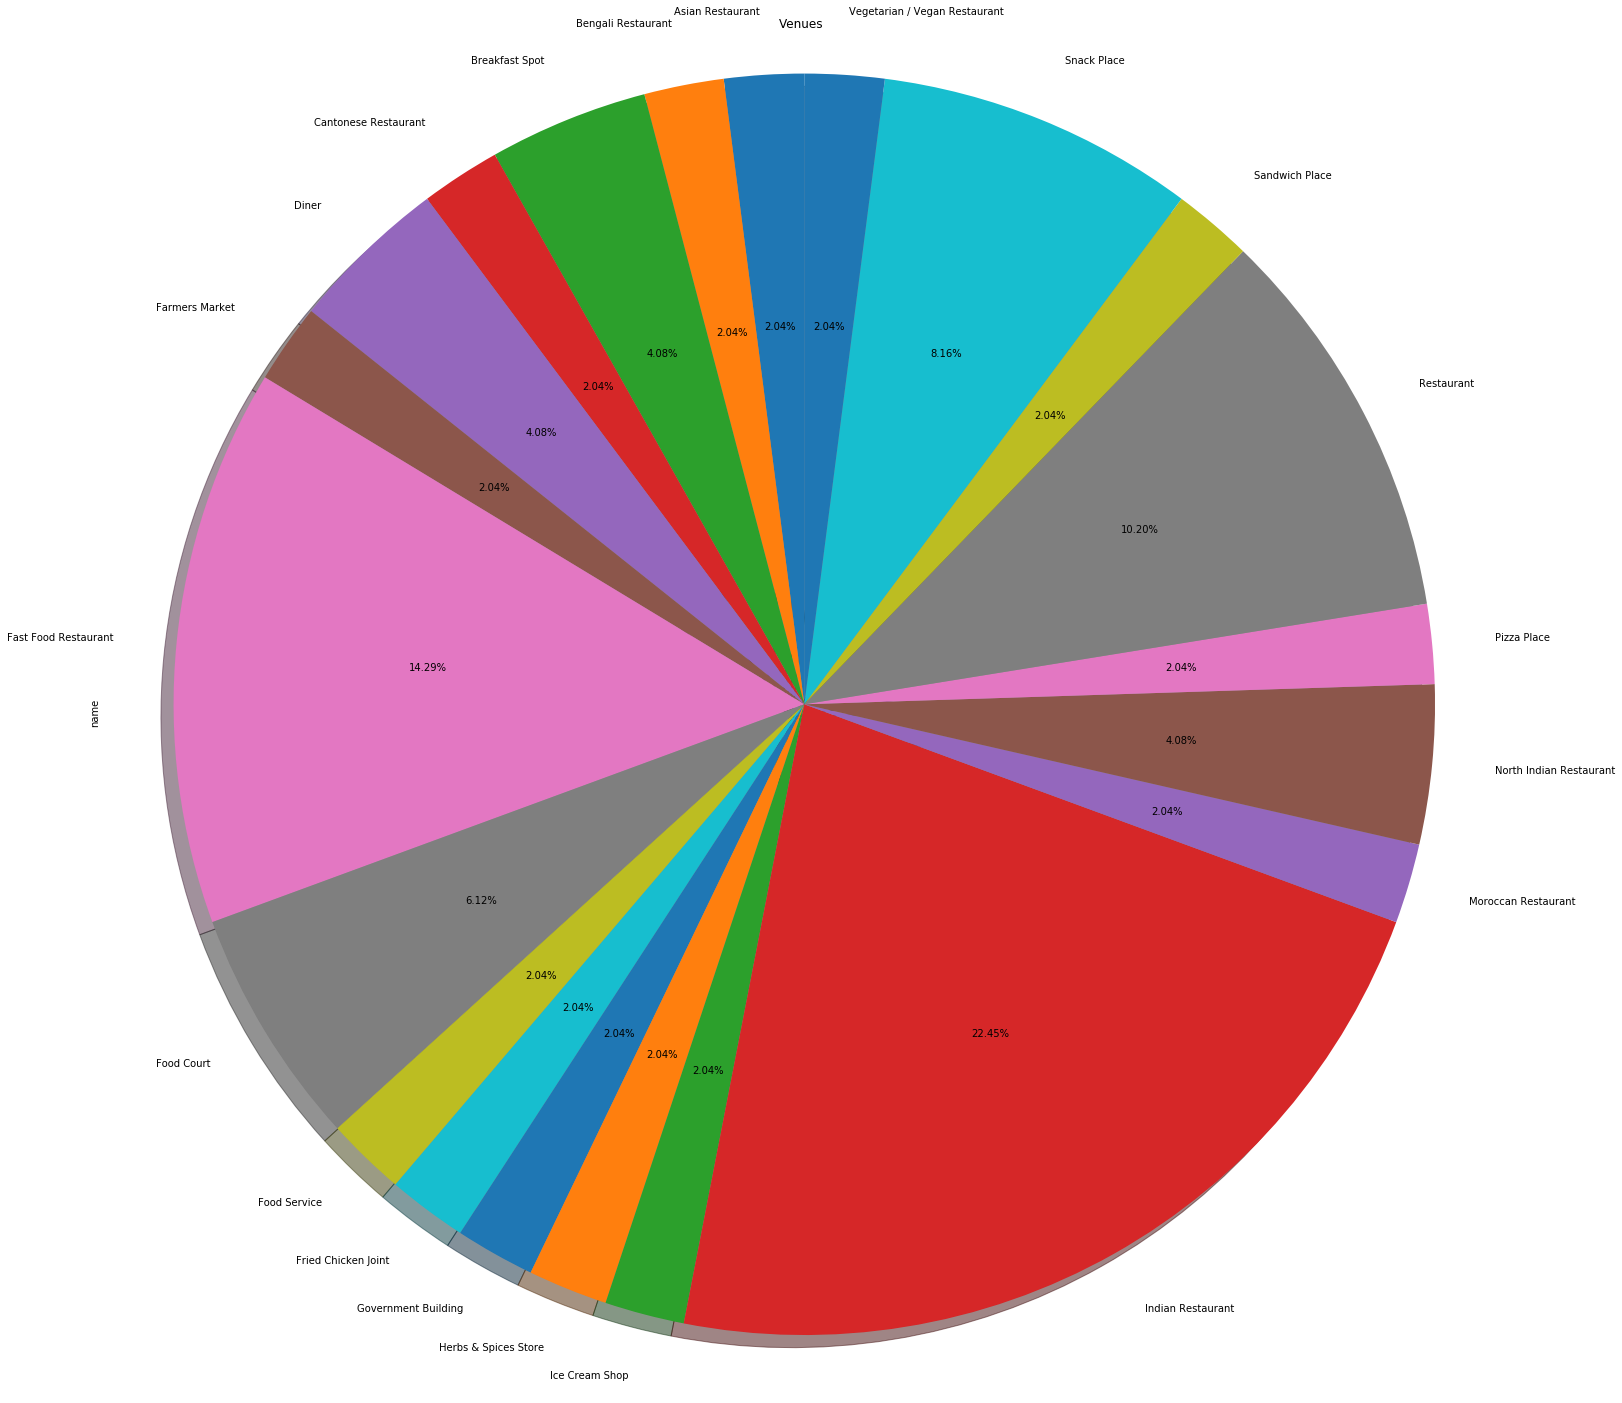

In [82]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
df_an['name'].plot(kind='pie',
                            figsize=(25, 25),
                            autopct='%2.2f%%', 
                            startangle=90,     
                            shadow=True,            
                            )

plt.title('Venues')
plt.axis('equal')

plt.show()

In [92]:
df_ana.categories
name=list(df_ana['name'])
df_vol1=df_ana[['categories']]
df_vol1['frequency']=name
df_vol1

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,categories,frequency
0,Asian Restaurant,1
1,Bengali Restaurant,1
2,Breakfast Spot,2
3,Cantonese Restaurant,1
4,Diner,2
5,Farmers Market,1
6,Fast Food Restaurant,7
7,Food Court,3
8,Food Service,1
9,Fried Chicken Joint,1


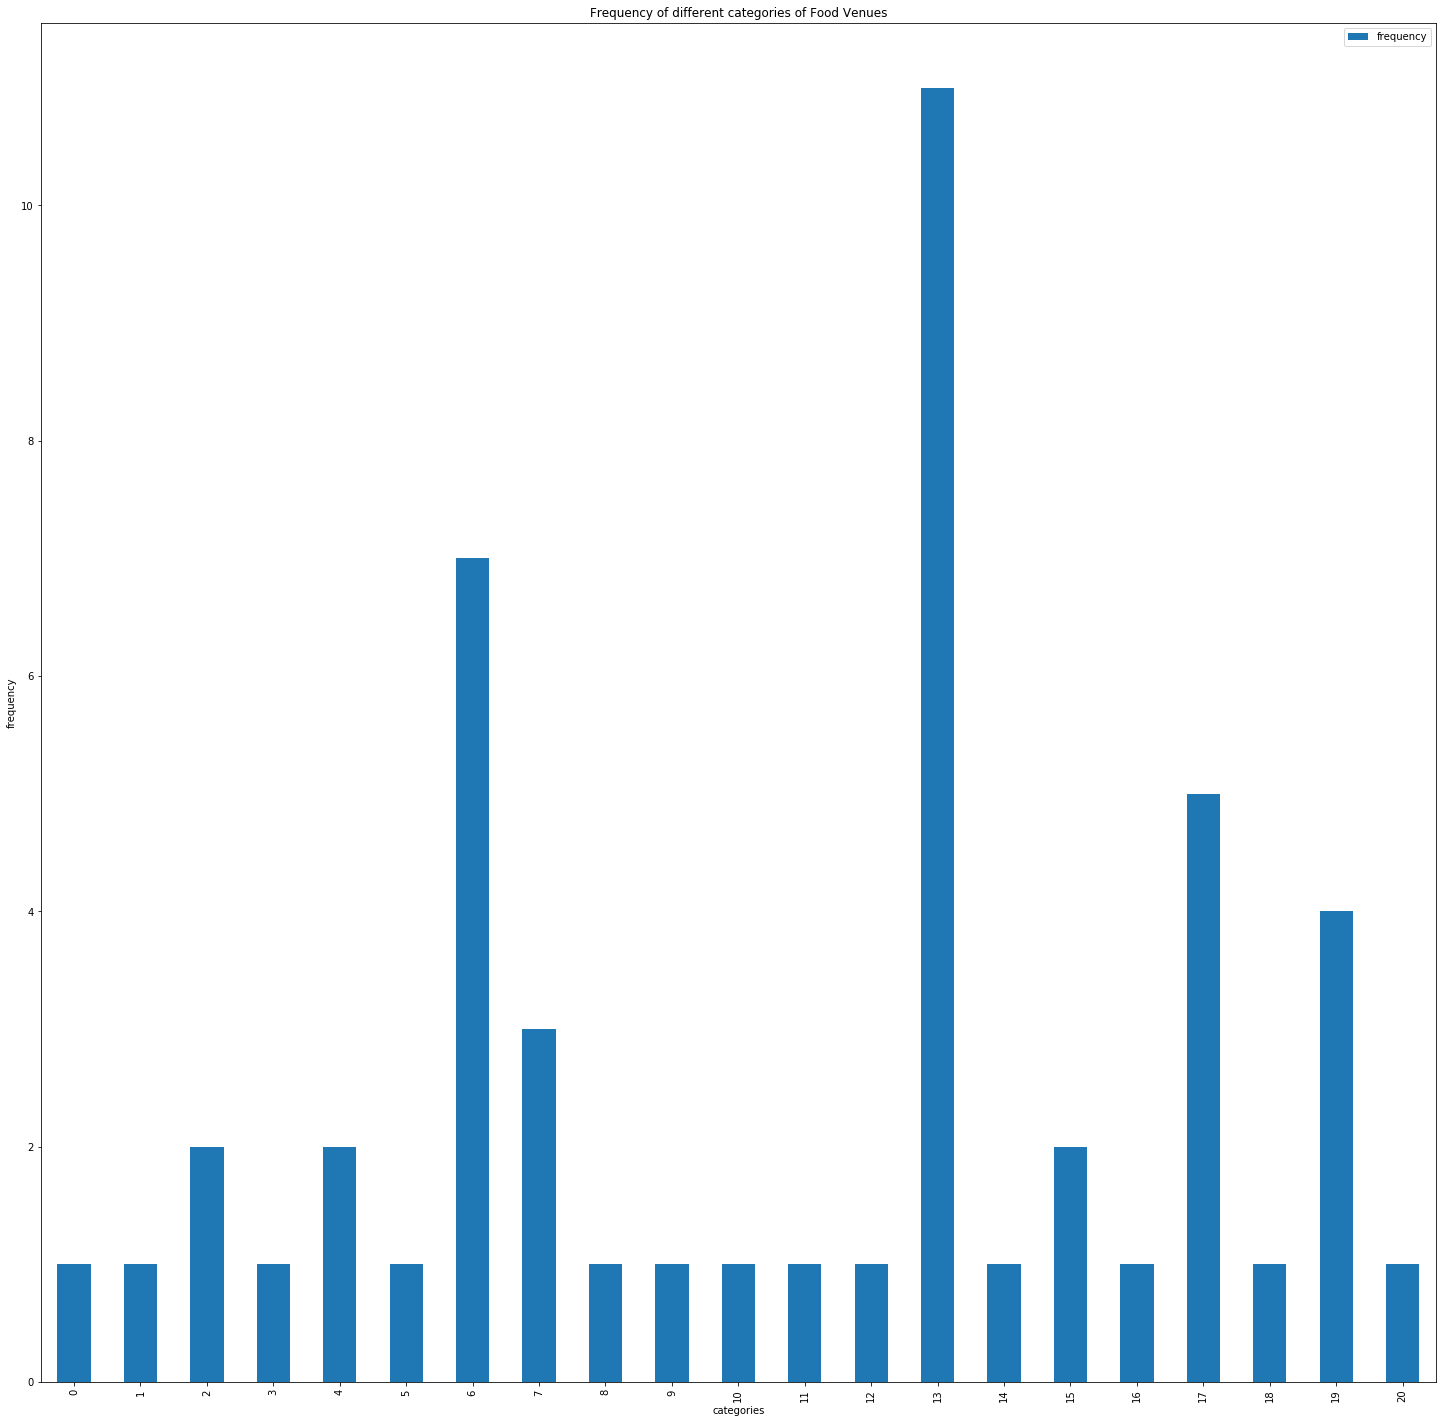

In [99]:
df_vol1.plot(kind='bar', figsize=(25, 25), rot=90) 
plt.xlabel('categories')
plt.ylabel('frequency')
plt.title('Frequency of different categories of Food Venues')
plt.show()

In [118]:
df_onehot = pd.get_dummies(dataframe_filtered[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['name'] = dataframe_filtered['name']

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot

,name,Asian Restaurant,Bengali Restaurant,Breakfast Spot,Cantonese Restaurant,Diner,Farmers Market,Fast Food Restaurant,Food Court,Food Service,Fried Chicken Joint,Government Building,Herbs & Spices Store,Ice Cream Shop,Indian Restaurant,Moroccan Restaurant,North Indian Restaurant,Pizza Place,Restaurant,Sandwich Place,Snack Place,Vegetarian / Vegan Restaurant
0,Banglore fast food,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Rio Fast-food,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Radhe Food Court,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bueno Fast Food,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,South Indian Food Court,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,Yash food point and cafe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,South Food Corner,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Vijay Food Court,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,Rajvee Food Corner,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,Four Food Restaurant,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [120]:
# set number of clusters
kclusters = 5

clustering = df_onehot.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 1, 1, 2, 0, 0, 3, 2, 2], dtype=int32)

In [126]:
#df_onehot.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = dataframe_filtered

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(df_onehot.set_index('name'), on='name')

df_merged.head() # check the last columns!

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,Cluster Labels,Asian Restaurant,Bengali Restaurant,Breakfast Spot,Cantonese Restaurant,Diner,Farmers Market,Fast Food Restaurant,Food Court,Food Service,Fried Chicken Joint,Government Building,Herbs & Spices Store,Ice Cream Shop,Indian Restaurant,Moroccan Restaurant,North Indian Restaurant,Pizza Place,Restaurant,Sandwich Place,Snack Place,Vegetarian / Vegan Restaurant
0,Banglore fast food,Fast Food Restaurant,NaN,IN,NaN,India,NaN,1281,[India],"[{'label': 'display', 'lat': 23.23475564627199...",23.234756,72.650373,NaN,NaN,50a51858e4b05906e7e9fbd3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Rio Fast-food,Indian Restaurant,Sector 21,IN,Gandhinagar,India,NaN,1885,"[Sector 21, Gandhinagar, Gujarāt, India]","[{'label': 'display', 'lat': 23.233337, 'lng':...",23.233337,72.664070,NaN,Gujarāt,5751b77b498e15594af81942,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Radhe Food Court,Fast Food Restaurant,Shop No.5,IN,"Sector 11, Gandhinagar",India,"Plot No. 231,",2216,"[Shop No.5 (Plot No. 231,), Sector 11, Gandhin...","[{'label': 'display', 'lat': 23.23156707244295...",23.231567,72.668937,NaN,Gujrath,522db12e11d22df748c718f5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bueno Fast Food,Fast Food Restaurant,NaN,IN,NaN,India,NaN,3145,[India],"[{'label': 'display', 'lat': 23.19890241600998...",23.198902,72.633703,NaN,NaN,54a2ad58498e1c9f0f011400,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,South Indian Food Court,Indian Restaurant,NaN,IN,NaN,India,NaN,3270,[India],"[{'label': 'display', 'lat': 23.19701971800403...",23.197020,72.634910,NaN,NaN,53ba17d4498e531e3fad6ad0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [130]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['lat'], df_merged['lng'], df_merged['name'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [137]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,categories,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,Cluster Labels,Asian Restaurant,Bengali Restaurant,Breakfast Spot,Cantonese Restaurant,Diner,Farmers Market,Fast Food Restaurant,Food Court,Food Service,Fried Chicken Joint,Government Building,Herbs & Spices Store,Ice Cream Shop,Indian Restaurant,Moroccan Restaurant,North Indian Restaurant,Pizza Place,Restaurant,Sandwich Place,Snack Place,Vegetarian / Vegan Restaurant
5,None,India,NaN,3377,[India],"[{'label': 'display', 'lat': 23.19615821354091...",23.196158,72.634438,NaN,NaN,50aba1d0e4b079c12db7c28d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Asian Restaurant,India,NaN,3543,[India],"[{'label': 'display', 'lat': 23.19559346008514...",23.195593,72.632150,NaN,NaN,542040d5498ec391c4248cd7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Food Court,India,Vastrapur,23687,"[Alpha 1 (Vastrapur), A`bad, Gujarāt, India]","[{'label': 'display', 'lat': 23.03996371951654...",23.039964,72.531746,NaN,Gujarāt,4eac0e779adfbd5e5dc71c22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12,Herbs & Spices Store,India,Shertha Town,11657,"[Shertha Highway (Shertha Town), Gandhinagar 3...","[{'label': 'display', 'lat': 23.205563, 'lng':...",23.205563,72.536922,382423,Gujarāt,552e3b12498e442a03f7f4dd,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
13,Food Service,India,NaN,13997,"[Vitthal Mall, Ahmedabad 382424, Gujarāt, India]","[{'label': 'display', 'lat': 23.1067, 'lng': 7...",23.106700,72.597984,382424,Gujarāt,5da034b309892f00089c9168,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
15,Bengali Restaurant,India,Motera Rd.,13439,"[F2-3, Sankalp Arcade, Nr. HP Petrol Pump (Mot...","[{'label': 'display', 'lat': 23.109476, 'lng':...",23.109476,72.605410,382424,Gujarāt,5b73e189178a2a002cb14803,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,Cantonese Restaurant,India,NaN,15079,[India],"[{'label': 'display', 'lat': 23.10026550292968...",23.100266,72.587540,NaN,NaN,535948b6498ee37b2bb56295,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,Government Building,India,NaN,19054,"[Meghaninagar, Ahmedabad, Gujarāt, India]","[{'label': 'display', 'lat': 23.05537249081106...",23.055372,72.613104,NaN,Gujarāt,4d42689674c0236ad872d1d1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
22,North Indian Restaurant,India,NaN,15441,"[Ahmedabad 382340, Gujarāt, India]","[{'label': 'display', 'lat': 23.0856, 'lng': 7...",23.085600,72.630875,382340,Gujarāt,5a8078524b78c533d04ee1ee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
26,Diner,India,NaN,22907,[India],"[{'label': 'display', 'lat': 23.02718135270917...",23.027181,72.581409,NaN,NaN,4ec4c67d61af4438d0fed771,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [138]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,categories,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,Cluster Labels,Asian Restaurant,Bengali Restaurant,Breakfast Spot,Cantonese Restaurant,Diner,Farmers Market,Fast Food Restaurant,Food Court,Food Service,Fried Chicken Joint,Government Building,Herbs & Spices Store,Ice Cream Shop,Indian Restaurant,Moroccan Restaurant,North Indian Restaurant,Pizza Place,Restaurant,Sandwich Place,Snack Place,Vegetarian / Vegan Restaurant
0,Fast Food Restaurant,India,NaN,1281,[India],"[{'label': 'display', 'lat': 23.23475564627199...",23.234756,72.650373,NaN,NaN,50a51858e4b05906e7e9fbd3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fast Food Restaurant,India,"Plot No. 231,",2216,"[Shop No.5 (Plot No. 231,), Sector 11, Gandhin...","[{'label': 'display', 'lat': 23.23156707244295...",23.231567,72.668937,NaN,Gujrath,522db12e11d22df748c718f5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fast Food Restaurant,India,NaN,3145,[India],"[{'label': 'display', 'lat': 23.19890241600998...",23.198902,72.633703,NaN,NaN,54a2ad58498e1c9f0f011400,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,Fast Food Restaurant,India,Chiloda Pratij Highway,13322,[Opp. Giyod Malawi Temple (Chiloda Pratij High...,"[{'label': 'display', 'lat': 23.283606, 'lng':...",23.283606,72.761732,382355,Gujarāt,56794224498e1e6e30b47b23,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,Fast Food Restaurant,India,Sabarmati,16304,"[Near N.M. High School, Behind Sabarmati Polic...","[{'label': 'display', 'lat': 23.08681056140707...",23.086811,72.591395,382424,Gujarāt,513217c4e4b06242f0f97fb9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,Fast Food Restaurant,India,NaN,26955,[India],"[{'label': 'display', 'lat': 23.020164, 'lng':...",23.020164,72.505897,NaN,NaN,5846c5dd94c6901d8d58f9c9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39,Fast Food Restaurant,India,"Opp. Memnagar Fire Station,navrangpura",20691,"[19-20,akshar Arcade (Opp. Memnagar Fire Stati...","[{'label': 'display', 'lat': 23.04570177514728...",23.045702,72.589535,380009,Gujarāt,53627a44498e260f81f3dab1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [139]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,categories,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,Cluster Labels,Asian Restaurant,Bengali Restaurant,Breakfast Spot,Cantonese Restaurant,Diner,Farmers Market,Fast Food Restaurant,Food Court,Food Service,Fried Chicken Joint,Government Building,Herbs & Spices Store,Ice Cream Shop,Indian Restaurant,Moroccan Restaurant,North Indian Restaurant,Pizza Place,Restaurant,Sandwich Place,Snack Place,Vegetarian / Vegan Restaurant
1,Indian Restaurant,India,NaN,1885,"[Sector 21, Gandhinagar, Gujarāt, India]","[{'label': 'display', 'lat': 23.233337, 'lng':...",23.233337,72.664070,NaN,Gujarāt,5751b77b498e15594af81942,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Indian Restaurant,India,NaN,3270,[India],"[{'label': 'display', 'lat': 23.19701971800403...",23.197020,72.634910,NaN,NaN,53ba17d4498e531e3fad6ad0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,Indian Restaurant,India,NaN,5235,[India],"[{'label': 'display', 'lat': 23.17712726401786...",23.177127,72.639402,NaN,NaN,5061cf8ce4b0c3acc9c39b7e,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,Indian Restaurant,India,S. G. Highway,23313,"[New York Tower (S. G. Highway), Ahmedabad, Gu...","[{'label': 'display', 'lat': 23.05173647649029...",23.051736,72.518591,NaN,Gujarāt,4ebbf055d3e31a8e61b11175,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11,Indian Restaurant,India,NaN,22448,"[C.G. Road, Ahmedabad, Gujarāt, India]","[{'label': 'display', 'lat': 23.038264, 'lng':...",23.038264,72.562001,NaN,Gujarāt,4dc8db0f52b1b9daeb531f76,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17,Indian Restaurant,India,Chandkheda,14192,"[Somewhere In (Chandkheda), Ahmedabad, Gujarāt...","[{'label': 'display', 'lat': 23.10750689323336...",23.107507,72.591158,NaN,Gujarāt,540330ac498ede7ef8c5be79,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19,Indian Restaurant,India,S.G. Highway,25956,"[Iscon Mall (S.G. Highway), Ahmedabad, Gujarāt...","[{'label': 'display', 'lat': 23.03154220680889...",23.031542,72.504951,NaN,Gujarāt,5244051111d26515087875b0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
25,Indian Restaurant,India,Ankur Char Rasta,20703,"[Mahershi Avenue (Ankur Char Rasta), Ahmedabad...","[{'label': 'display', 'lat': 23.05839090802537...",23.058391,72.555685,NaN,Gujarāt,500d786d64a4c9240d9af48a,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31,Indian Restaurant,India,NaN,23660,"[Alpha One Mall, Ahmedabad, Gujarāt, India]","[{'label': 'display', 'lat': 23.04003592934335...",23.040036,72.532138,NaN,Gujarāt,52baa2ca11d2970c7cef8da0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
42,Indian Restaurant,India,NaN,25028,[India],"[{'label': 'display', 'lat': 23.04045295715332...",23.040453,72.506935,NaN,NaN,50df19c2e4b0a2f20630bd13,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [140]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,categories,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,Cluster Labels,Asian Restaurant,Bengali Restaurant,Breakfast Spot,Cantonese Restaurant,Diner,Farmers Market,Fast Food Restaurant,Food Court,Food Service,Fried Chicken Joint,Government Building,Herbs & Spices Store,Ice Cream Shop,Indian Restaurant,Moroccan Restaurant,North Indian Restaurant,Pizza Place,Restaurant,Sandwich Place,Snack Place,Vegetarian / Vegan Restaurant
7,Snack Place,India,NaN,3570,[India],"[{'label': 'display', 'lat': 23.19533470627333...",23.195335,72.632121,NaN,NaN,542abfbf498eefacefed103b,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29,Snack Place,India,Vandematram Cross Road,17890,"[G-18, Shukan Residency (Vandematram Cross Roa...","[{'label': 'display', 'lat': 23.0936389570068,...",23.093639,72.545921,NaN,Gujarāt,512a38a7e4b02029333c8f01,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35,Snack Place,India,NaN,19579,"[Street opposite Sabarmati Ashram, Ahmedabad, ...","[{'label': 'display', 'lat': 23.060007, 'lng':...",23.060007,72.578120,NaN,Gujarāt,56a6fca9498ef180e14393a6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36,Snack Place,India,NaN,21021,[India],"[{'label': 'display', 'lat': 23.05641065539594...",23.056411,72.553101,NaN,NaN,4f4d0734e4b0cb12b8b3133d,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [141]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,categories,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,Cluster Labels,Asian Restaurant,Bengali Restaurant,Breakfast Spot,Cantonese Restaurant,Diner,Farmers Market,Fast Food Restaurant,Food Court,Food Service,Fried Chicken Joint,Government Building,Herbs & Spices Store,Ice Cream Shop,Indian Restaurant,Moroccan Restaurant,North Indian Restaurant,Pizza Place,Restaurant,Sandwich Place,Snack Place,Vegetarian / Vegan Restaurant
18,Restaurant,India,Iscon cross road,26295,"[Nr. Crossword (Iscon cross road), Ahmedabad, ...","[{'label': 'display', 'lat': 23.02702576122815...",23.027026,72.506279,NaN,Gujarāt,4f489a62e4b0bde5092679b7,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
20,Restaurant,India,Satellite,26128,"[4th Floor, Gulmohar Park Mall (Satellite), Ah...","[{'label': 'display', 'lat': 23.02665962797409...",23.026660,72.509851,380015,Gujarāt,538ef908498ed2e9e76a85de,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
24,Restaurant,India,Shukan Bunglows,18298,"[Karnavati Nagar, (Shukan Bunglows), Ahmedabad...","[{'label': 'display', 'lat': 23.05898569001544...",23.058986,72.654750,382346,Gujarāt,4ead6024dab4a75e0a0ebbe9,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
33,Restaurant,India,NaN,19716,"[Ahmedabad, Gujarāt, India]","[{'label': 'display', 'lat': 23.0519559933087,...",23.051956,72.600384,NaN,Gujarāt,50f52c83e4b0ebb806da2382,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
49,Restaurant,India,C G road,24226,"[White House (C G road), Ahmedabad, Gujarāt, I...","[{'label': 'display', 'lat': 23.02343898145907...",23.023439,72.555533,NaN,Gujarāt,4d4587c8bf61a1cdbc1214ac,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


THANK YOU THIS NOTEBOOK BELONGS TO SJ